# Programming Assignment 4: Classification (Now due Friday 11/19)

In this assignment you will train a binary classifier for predicting whether a patient's breast tumor is malignant or  benign. You will be provided a data set with tumor traits. This data set is available in scikit-learn.

Your task is to train and build a classifier  by following the steps below.

Implement all tasks in your notebook and submit your notebook ipynb file. 

## Task 1  (25 points)

**Task 1A**: Build a decision tree classifier by creating a single random training and testing dataset. Your training set should be 80% of your original sample set. Visualize your decision tree and report its accuracy on your testing dataset. (5 points)

In [1]:
import pandas as pd
import numpy as np
import sklearn as sklearn
from pprint import pprint
#Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt

#Import the dataset 
#x is the features without the result. y is the target
X,y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training, 20% test

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)

# Train Decision Tree Classifer
#dt = dt.fit(X_train,y_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",dt.score(X_test,y_test)*100,"%")

Accuracy: 93.85964912280701 %


In [2]:
#Text representation of the decision tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_22 <= 105.15
|   |--- feature_27 <= 0.14
|   |   |--- feature_13 <= 48.98
|   |   |   |--- class: 1
|   |   |--- feature_13 >  48.98
|   |   |   |--- feature_24 <= 0.11
|   |   |   |   |--- class: 1
|   |   |   |--- feature_24 >  0.11
|   |   |   |   |--- class: 0
|   |--- feature_27 >  0.14
|   |   |--- feature_21 <= 25.94
|   |   |   |--- class: 1
|   |   |--- feature_21 >  25.94
|   |   |   |--- feature_18 <= 0.02
|   |   |   |   |--- feature_23 <= 701.75
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_23 >  701.75
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  0.02
|   |   |   |   |--- class: 0
|--- feature_22 >  105.15
|   |--- feature_27 <= 0.15
|   |   |--- feature_21 <= 19.91
|   |   |   |--- class: 1
|   |   |--- feature_21 >  19.91
|   |   |   |--- feature_20 <= 16.80
|   |   |   |   |--- feature_4 <= 0.09
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  0.09
|   |   |   |   |   |--- feature_20 <= 16.62
|   |   

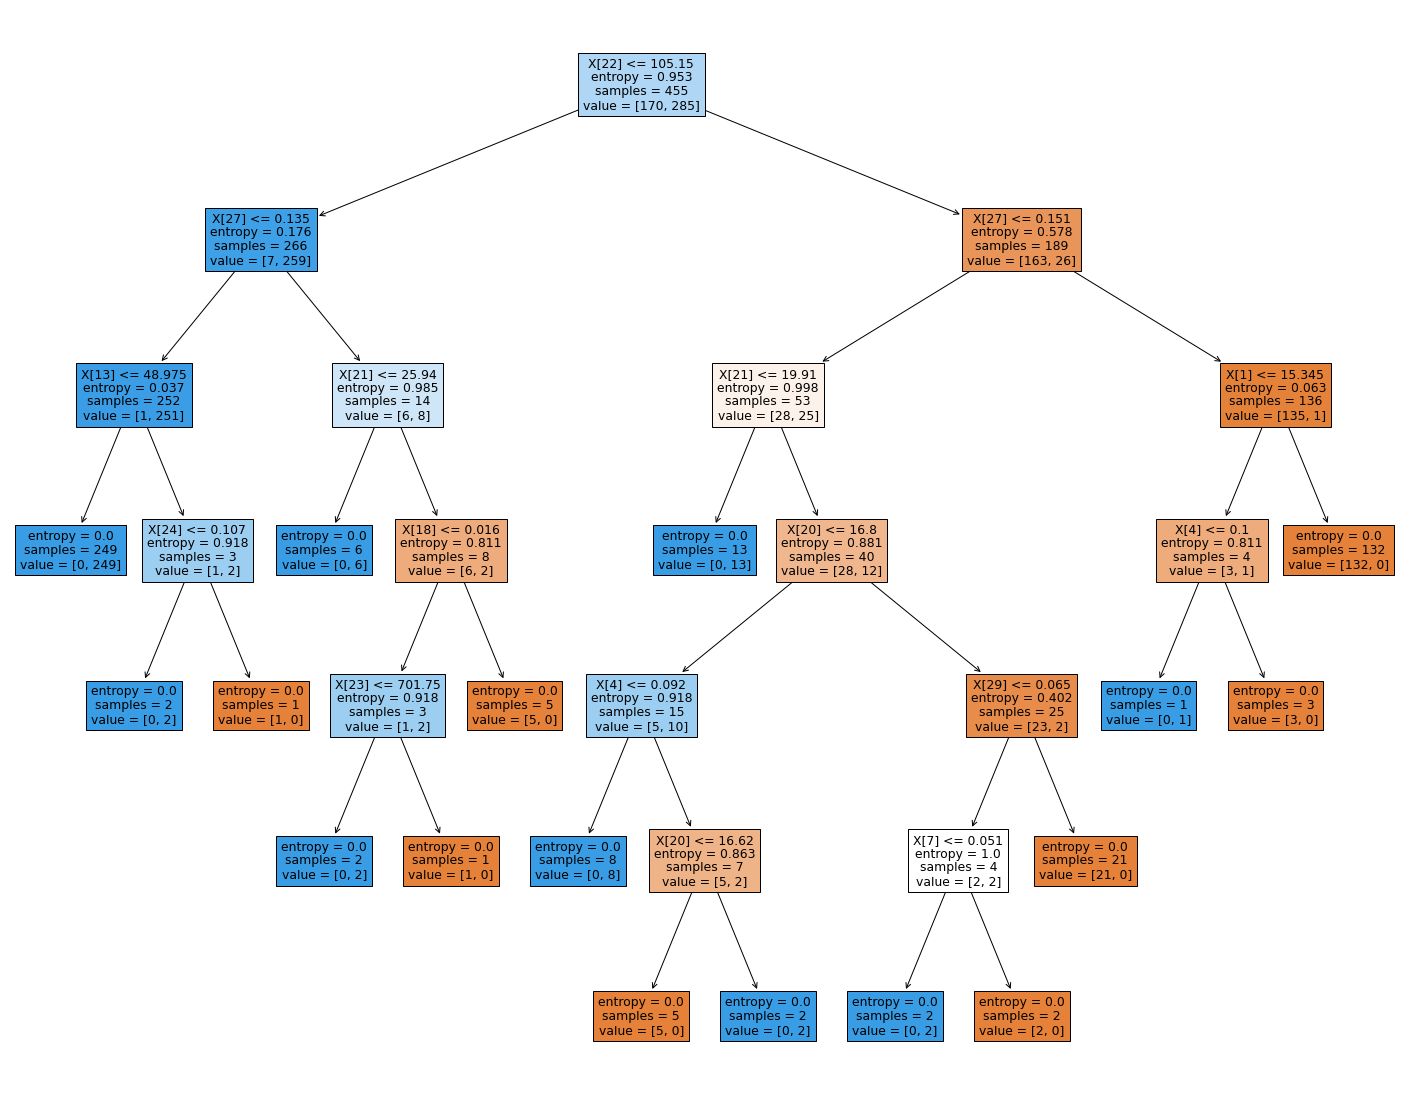

In [3]:
#Visualize the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, filled=True)


**Task 1.B:** Evaluate the performance of your classifer over 10 random training/test sets (of equal size) and report all accuracy values you collected as well as the average accuracy. (15 points)


In [4]:
accArray = []
avgSum = 0
#np.random.seed(42)
#how to get random set?
#test = 114
#train = 455

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # 80% training, 20% test

    #Create Decision Tree classifer object
    dt = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)

    # Model Accuracy
    acc = dt.score(X_test,y_test)
    accArray.append(acc)
    avgSum += acc

avgSum /= 10
print("Average Accuracy:",avgSum*100,"%")
print(accArray)

Average Accuracy: 91.82456140350877 %
[0.9614035087719298, 0.9052631578947369, 0.887719298245614, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9192982456140351, 0.9052631578947369, 0.887719298245614, 0.9263157894736842]


**Task 1.C:** Compare the accuracy your observed with each of the two approaches (are they similar/different, how accuracy flunctuates, etc). (5points)

The first appraoch expereinces greater fluctuations in the accuracy percentage as it depends only on one input. I have seen it range from about 90% to almost 96%. This indicates that there are some random samples that are better than others and can lead to a better or worse model for predictions. The second method is a more robust measure of this model's accuracy as it runs the code many times and finds the average. The two approaches are similar in their results, but the second method has smaller fluctuations in the accuracy score for the decision tree.

## Task 2 (25 points) 

**Task 2.A:** Perform 10-fold cross validation to explore how the max_depth and the min_samples parameter of your classifer affect its accuracy.  You are NOT allowed to use the grid search function for this task. You should try tree depths values ranging from 1 to 20 and min samples at leaf that range from 1 to 10. (10points, 5 for each parameter)


In [5]:
%reset -f
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sklearn
from pprint import pprint
#Import the DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import model_selection 
from matplotlib import pyplot as plt

**Task 2.B:** Plot 2 boxplot graphs  that show how each of these parameters affect the accuracy. (5 points each plot)


Mean accuracy: [0.90777778 0.92985507 0.9342029  0.93637681 0.93864734 0.92763285
 0.93642512 0.9342029  0.94521739 0.93647343 0.93642512 0.94961353
 0.9342029  0.92980676 0.93202899 0.9363285  0.92980676 0.93647343
 0.93850242 0.93637681]
Selected model index: 11
Complexity: 12


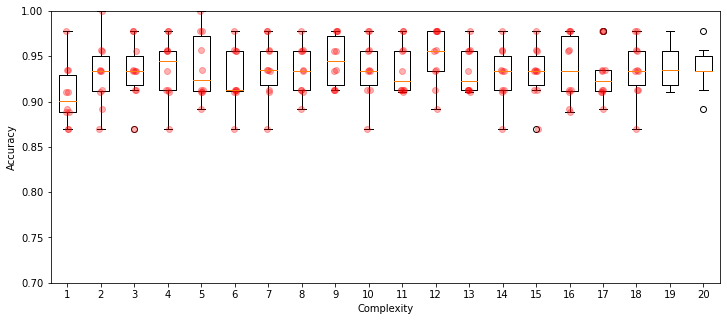

In [6]:
#tree depths values from 1 to 20
X,y = load_breast_cancer(return_X_y=True)

# Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Create a 10-fold cross validation set
#kf=model_selection.KFold(n=y.shape[0], n_folds=10, shuffle=True, random_state=0)
kf = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 0)
 
#Search the parameter among the following
#C is the max depth and ranges from 1 to 20
C=np.arange(1,21,)
acc = np.zeros((10,20))
i=0
for train_index, val_index in kf.split(X_train):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_train,y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1
    
plt.boxplot(acc);
for i in range(18):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)

print('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
print('Complexity: ' + str(C[np.argmax(np.mean(acc,axis = 0))]))
plt.ylim((0.7,1.))
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.savefig("model_selection.png",dpi=300, bbox_inches='tight')
### 5 has the best accuracy

Mean accuracy: [0.91707317 0.92195122 0.92195122 0.93170732 0.94146341 0.93170732
 0.91463415 0.9097561  0.91219512 0.91463415]
Selected model index: 4
Complexity: 5


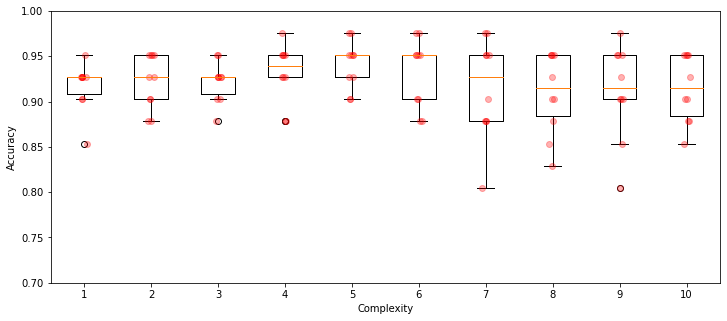

In [7]:
#min samples at leaf that range from 1 to 10

#Create a 10-fold cross validation set
#kf=model_selection.KFold(n=y.shape[0], n_folds=10, shuffle=True, random_state=0)
kf = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 0)
 
#Search the parameter among the following
#C is the max depth and ranges from 1 to 20
C=np.arange(1,11,)
acc = np.zeros((10,10))
i=0
for train_index, val_index in kf.split(X_train):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=c)
        dt.fit(X_train,y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1
    
plt.boxplot(acc);
for i in range(10):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)

print('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
print('Complexity: ' + str(C[np.argmax(np.mean(acc,axis = 0))]))
plt.ylim((0.7,1.))
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.savefig("model_selection.png",dpi=300, bbox_inches='tight')

### 5 has the best accuracy


**Task 2.C:** Use the training and testing set we provided to test the classifier with the best max_depth and min_samples_leaf parameters you discovered as well as classifier that use the default parameters for a decision tree. Which one is performing better in terms of accuracy? (5points)

In [4]:
#use csv's that were provided
%reset -f
%matplotlib inline

import pandas as pd
import numpy as np
import sklearn as sklearn
from pprint import pprint

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt

#Import the dataset 
#x is the features without the result. y is the target
df_train = pd.read_csv('train.csv')
train_features = df_train.iloc[: , :-1]
train_targets = df_train.iloc[: , -1]

df_test = pd.read_csv('test.csv')
test_features = df_test.iloc[: , :-1]
test_targets = df_test.iloc[: , -1]

#max depth
dtTrain = tree.DecisionTreeClassifier(max_depth=5).fit(train_features,train_targets)
print("Accuracy for max depth:", dtTrain.score(test_features,test_targets)*100,"%")

#min samples
dtTest = tree.DecisionTreeClassifier(min_samples_leaf=5).fit(train_features,train_targets)
print("Accuracy for min samples leaf:", dtTest.score(test_features,test_targets)*100,"%")

Accuracy for max depth: 93.85964912280701 %
Accuracy for min samples leaf: 95.6140350877193 %


The min_samples_leaf parameter is better. It has a higher accuracy score by one to two percent compared to the max_depth parameter after running this cell multiple times.

## Task 3 (25 points) 

Perform a nested cross validation to explore how  different classification algorithms perform on this task. You should try random tree forest and kNN.  All of them could be validated through 5-fold validation and you should use the  grid search function available in sklearn for your internal cross validation. Discuss which classifier performed better. It is up to you which parameters you use in your grid search but keep in mind that the more parameter you use the longer the execution time. To help you TAs grading this part we ask that you restrict your exploration to a single parameter per model. 

In [11]:
#Random Tree Forest
%reset -f

import pandas as pd
import numpy as np
from pprint import pprint

#Import the DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
from sklearn import model_selection 

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.ensemble import RandomForestClassifier


X,y = load_breast_cancer(return_X_y=True)

# Train_test split

parameters = {'max_depth':[1e4,1e5,1e6]}

N_folds = 5

#Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

kf = model_selection.KFold(n_splits = N_folds, shuffle = True, random_state = 0)

acc = np.zeros((N_folds,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
#itereates 5 times?
for train_index, test_index in kf.split(X_train):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    clf = RandomForestClassifier() #change this line for kNNN
    clf = model_selection.GridSearchCV(clf, parameters) #This line does a cross-validation 
    clf.fit(X_train,y_train.ravel())
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    
print(metrics.accuracy_score(yhat, y))
print(metrics.confusion_matrix(yhat, y))


0.9630931458699473
[[201  10]
 [ 11 347]]


In [12]:
#kNN nested cross validation
%reset -f


import pandas as pd
import numpy as np
from pprint import pprint

#Import the DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
from sklearn import model_selection 

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

X,y = load_breast_cancer(return_X_y=True)

# Train_test split

parameters = {'leaf_size':[1e4,1e5,1e6]}

N_folds = 5

#Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

kf = model_selection.KFold(n_splits = N_folds, shuffle = True, random_state = 0)

acc = np.zeros((N_folds,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
#itereates 5 times?
for train_index, test_index in kf.split(X_train):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    clf = KNeighborsClassifier() #change this line for kNN
    clf = model_selection.GridSearchCV(clf, parameters) #This line does a cross-validation 
    clf.fit(X_train,y_train.ravel())
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    
print(metrics.accuracy_score(yhat, y))
print(metrics.confusion_matrix(yhat, y))

0.9701230228471002
[[198   3]
 [ 14 354]]


In terms of just the accuracy score, the kNN nested cross validation performed better. This classifier also had fewer false positives. 
However, this scenario deals with predicting cance. Having a false negative has severe consequences, so this category should have weighted importance. The random forest classifier has similar performance for the accuracy score at over 96% and has fewer false negatives, so this classifier performed better overall.

## Task 4 (25 points)

Once you identify your best classifier, train it on the training set we provided and report the confusion matrix, the recall and precision of it on the test set we provided.  You should also report  the F1-score.  The F1 score, commonly used in information retrieval, measures accuracy using the statistics precision *p* and recall *r*. The F1 score is given by:

$F1 = 2\frac{p \cdot r}{p+r}\ \ \mathrm{where}\ \ p = \frac{tp}{tp+fp},\ \ r = \frac{tp}{tp+fn}$

The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus, moderately good performance on both will be favored over extremely good performance on one and poor performance on the other.

In [1]:
#Random Tree Forest Classifier
%reset -f

import pandas as pd
import numpy as np
from pprint import pprint

#Import the DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
from sklearn import model_selection 

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

df_train = pd.read_csv('train.csv')
X_train = df_train.iloc[: , :-1]
X_test = df_train.iloc[: , -1]

df_test = pd.read_csv('test.csv')
y_train = df_test.iloc[: , :-1]
y_test = df_test.iloc[: , -1]


#yhat = y_test.copy()
#itereates 5 times?   
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
clf = RandomForestClassifier()
clf.fit(X_train,X_test)
y_train = scaler.transform(y_train)
yhat = clf.predict(y_train)

print(metrics.accuracy_score(yhat, y_test))
print(metrics.confusion_matrix(yhat, y_test))

0.9649122807017544
[[40  1]
 [ 3 70]]


In [3]:
print('Precision: %.3f' % precision_score(yhat, y_test))
print('Recall: %.3f' % recall_score(yhat, y_test))
print('F1 Score: %.3f' % f1_score(yhat, y_test))

Precision: 0.986
Recall: 0.959
F1 Score: 0.972
